In [20]:
import networkx as nx
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

In [27]:
M=nx.read_gml("polblogs.gml")

In [28]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)



In [30]:
pos = nx.spring_layout(G)

In [32]:
centrality = nx.eigenvector_centrality_numpy(G)

In [33]:
len(centrality)

1224

### 1.  Create a nice looking graph of the political blog network

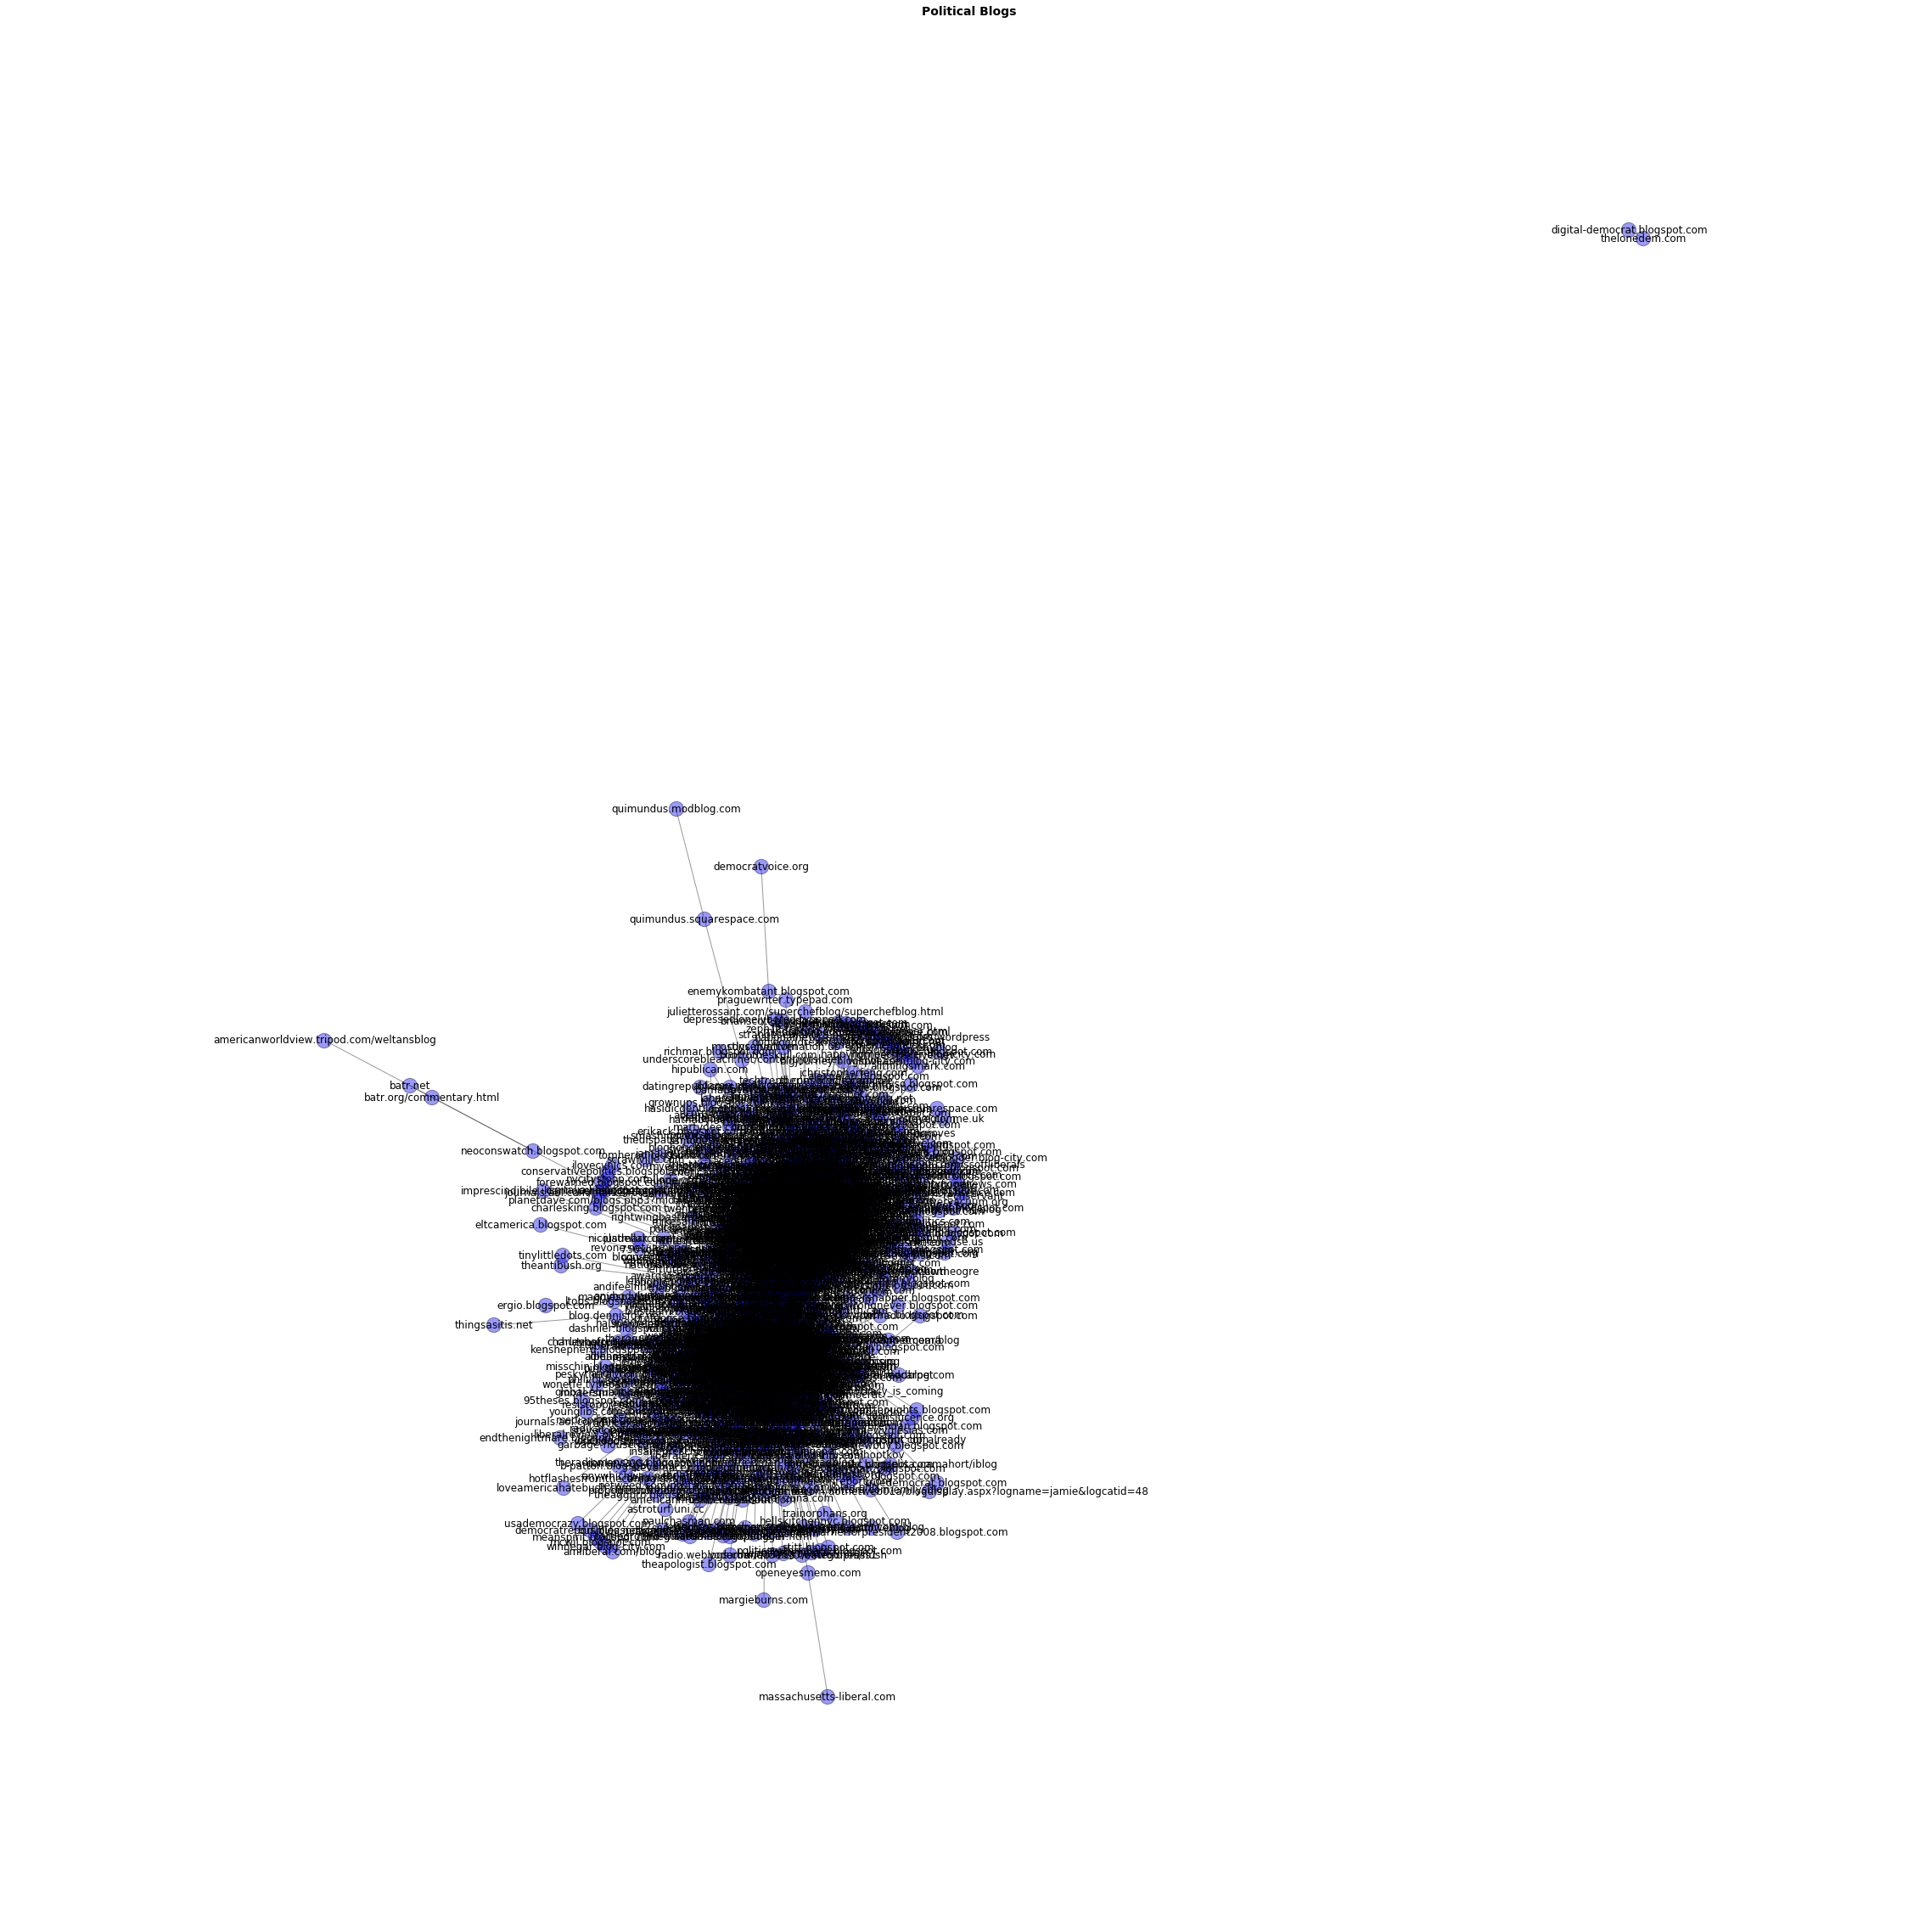

In [34]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("Political Blogs", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [23]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

### 2.  What are the 10 most influential blogs?

In [25]:
sorted(blog_list, key=lambda x: x[1], reverse=True)

[(u'atrios.blogspot.com', 0.19482295898856758),
 (u'dailykos.com', 0.16090716385818696),
 (u'washingtonmonthly.com', 0.1465405046383644),
 (u'digbysblog.blogspot.com', 0.1426558225197866),
 (u'bodyandsoul.typepad.com', 0.14114853531288887),
 (u'liberaloasis.com', 0.1395378566665858),
 (u'tbogg.blogspot.com', 0.1370485753554684),
 (u'corrente.blogspot.com', 0.1294307313422498),
 (u'talkingpointsmemo.com', 0.12700931078294161),
 (u'dneiwert.blogspot.com', 0.12238703900638011),
 (u'pandagon.net', 0.12184646040285363),
 (u'billmon.org', 0.11750626591024396),
 (u'xnerg.blogspot.com', 0.11480900917867658),
 (u'madkane.com/notable.html', 0.11419082729577257),
 (u'elayneriggs.blogspot.com', 0.11265673556127075),
 (u'busybusybusy.com', 0.1102550197846121),
 (u'michaelberube.com', 0.10609151756254857),
 (u'pacificviews.org', 0.10578482549977736),
 (u'nielsenhayden.com/electrolite', 0.105534492574463),
 (u'instapundit.com', 0.10538942033754217),
 (u'prospect.org/weblog', 0.10434664082865736),
 (u

<li>atrios.blogspot.com
<li>dailykos.com
<li>washingtonmonthly.com
<li>digbysblog.blogspot.com
<li>bodyandsoul.typepad.com
<li>liberaloasis.com
<li>tbogg.blogspot.com
<li>corrente.blogspot.com
<li>talkingpointsmemo.com
<li>dneiwert.blogspot.com

### 3.  What are the 10 least influential blogs?



In [26]:
sorted(blog_list, key=lambda x: x[1], reverse=False)

[(u'thelonedem.com', -2.1116763925323915e-18),
 (u'digital-democrat.blogspot.com', 8.027026811836423e-19),
 (u'americanworldview.tripod.com/weltansblog', 7.48979240439901e-09),
 (u'quimundus.modblog.com', 6.67572534492562e-08),
 (u'batr.org/commentary.html', 6.794245454770835e-07),
 (u'batr.net', 6.795053204378882e-07),
 (u'democratvoice.org', 1.0221602317237697e-06),
 (u'quimundus.squarespace.com', 6.056497487442249e-06),
 (u'massachusetts-liberal.com', 9.484711746614533e-06),
 (u'thingsasitis.net', 1.1737028626601018e-05),
 (u'loveamericahatebush.com', 2.0343745233532136e-05),
 (u'imprescindibile.ilcannocchiale.it', 2.389139248379528e-05),
 (u'eltcamerica.blogspot.com', 2.8363398418920152e-05),
 (u'usademocrazy.blogspot.com', 2.984877356285824e-05),
 (u'depressedlonelybored.typepad.com', 3.0375262145978854e-05),
 (u'margieburns.com', 3.320302726769523e-05),
 (u'endthenightmare.blogspot.com', 3.588733746888183e-05),
 (u'amliberal.com/blog', 3.621782064231576e-05),
 (u'mcwil.blogspot.c

<li>thelonedem.com
<li>digital-democrat.blogspot.com
<li>americanworldview.tripod.com/weltansblog
<li>quimundus.modblog.com
<li>batr.org/commentary.html
<li>batr.net
<li>democratvoice.org
<li>quimundus.squarespace.com
<li>massachusetts-liberal.com
<li>thingsasitis.net
<li>loveamericahatebush.com

### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)